# Deep Dive = Chi-Squared Test

To study the Chi-Squared test, I delve into a few questions that I thought were important in understanding the intuition behind the test and understanding how it is affected by changes in the data. This notebook will give my thoughts and process that I undertook to grasp the assumptions, types, uses, and caveats of this test.

I plan on exploring the following aspects for this deep dive:

* What is Chi-Squared test?
  * What is it used for?
  * What does it assume?
  * What does it inform from the results / What can a user undertand?
* How does the statistical power of test differ with different size of data?
* How does imbalance in categories affect the test results?
* What are the effects of scaling and encoding for different type of data in the test?

and finally, to summarize my understanding in a natural way,

* What intuition can I get from this test?

## **What is Chi-Squared test?**
The Chi-Squared test is a statistical test used to determine if there is a significant association between two categorical variables. It compares the observed frequencies in a dataset to the expected frequencies, which are calculated under the assumption that the variables are independent (null hypothesis). There are two common types of Chi-Squared tests:

1. Chi-Squared Test for Independence: This tests whether two categorical variables are independent of each other.
> Steps:
  * Null Hypothesis (H₀): The two variables are independent.
  * Alternative Hypothesis (H₁): The two variables are associated.
2. Chi-Squared Goodness of Fit Test: This tests whether the observed distribution of a categorical variable matches an expected distribution.
> Steps:
  * Null Hypothesis (H₀): The observed data fits the expected distribution.
  * Alternative Hypothesis (H₁): The observed data does not fit the expected distribution.

### **Assumptions**
1. The data are in the form of counts or frequencies (categorical).
> The Chi-Squared test calculates differences in observed versus expected counts, so it’s only appropriate for discrete data. But I would look into this with data that doesn't normally fit into this assumption and see how it behaves.
2. The observations are independent.
>  This means that the measurement of one observation doesn’t influence the measurement of any other observation. Although this is not in my scope of the deep dive, I would assume that it just gives inaccurate conclusions.
3. Expected frequencies should be 5 or more for most cells.
> Typically, each expected frequency in the contingency table should be at least 5. I will investigate this assumption with extremely imbalanced data.

### **Results and Interpretation**
* **Chi-Squared Statistic (𝜒2):** This value represents the sum of the squared differences between the observed and expected frequencies, divided by the expected frequencies.
* **Degrees of Freedom (df):** Calculated as (number of rows − 1) × (number of columns − 1) or Exposure Categories (Independent Variable — the one that is thought to potentially influence or be associated with another variable.) times the Outcome Categories (Dependent Variable — the one that might be affected by the exposure.) [Ref.](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module8-CategoricalData/PH717-Module8-CategoricalData3.html)
* **P-value:** The p-value tells us if the observed association is statistically significant.

* **Chi-Squared Test of Independence:** A significant result (small p-value) suggests an association between two variables, while a non-significant result (large p-value) suggests independence.

* **Chi-Squared Goodness-of-Fit Test:** A significant result indicates that the observed distribution does not fit the expected distribution, while a non-significant result suggests that the observed data match the expected pattern.

## Exploration Process
For this deep dive, I will use synthetic data as I think that I will be able to create the data according to the requirements of my search for answers in this deep dive. Further, I will try to explain what I thought and did during explaring my questions.

### **How does the statistical power of test differ with different size of data?**




Analyzing none effect size:


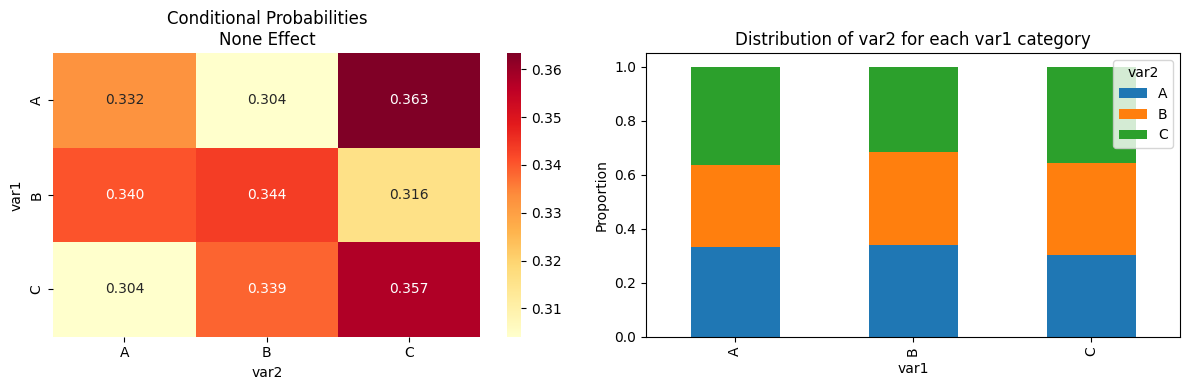

Chi-square statistic: 2.97
p-value: 5.6362e-01

Contingency Table:
var2    A    B    C
var1               
A     118  108  129
B     111  112  103
C      97  108  114

Conditional Probabilities Used:
A: [0.33, 0.33, 0.34]
B: [0.33, 0.33, 0.34]
C: [0.33, 0.33, 0.34]

Analyzing small effect size:


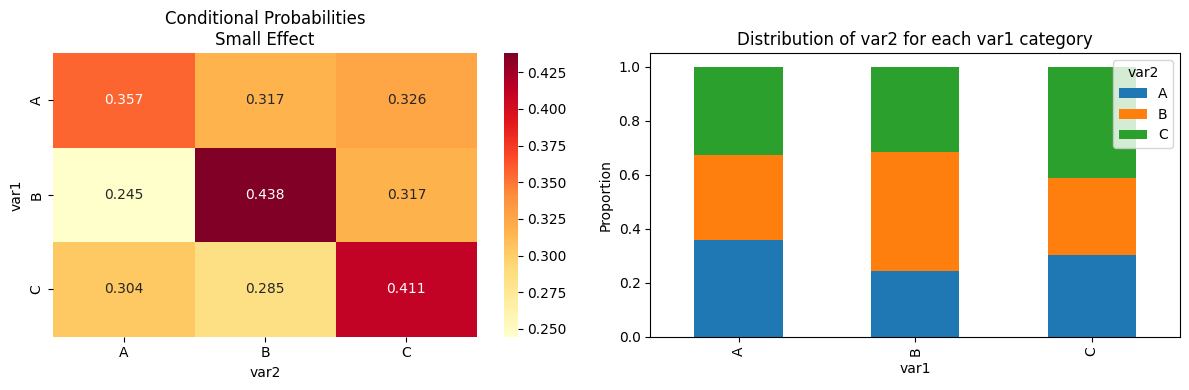

Chi-square statistic: 24.37
p-value: 6.7280e-05

Contingency Table:
var2    A    B    C
var1               
A     125  111  114
B      81  145  105
C      97   91  131

Conditional Probabilities Used:
A: [0.38, 0.32, 0.3]
B: [0.3, 0.38, 0.32]
C: [0.32, 0.3, 0.38]

Analyzing medium effect size:


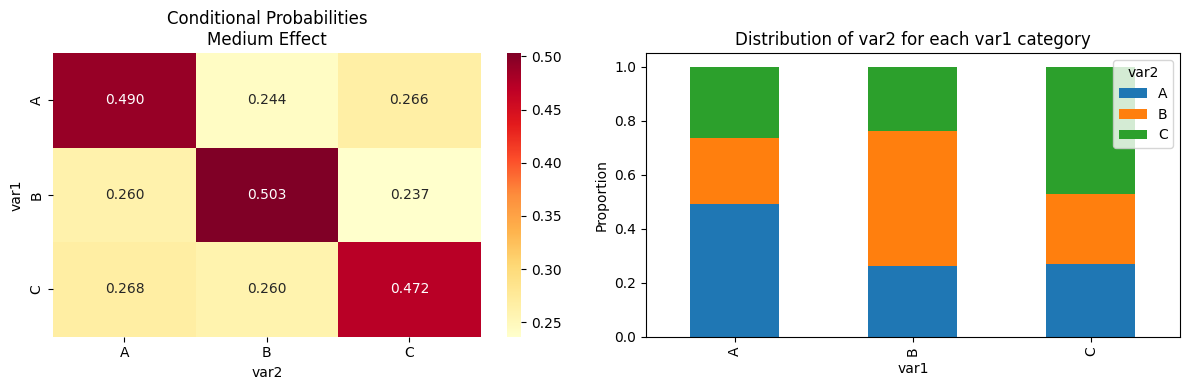

Chi-square statistic: 108.84
p-value: 1.2871e-22

Contingency Table:
var2    A    B    C
var1               
A     153   76   83
B      87  168   79
C      95   92  167

Conditional Probabilities Used:
A: [0.5, 0.25, 0.25]
B: [0.25, 0.5, 0.25]
C: [0.25, 0.25, 0.5]

Analyzing large effect size:


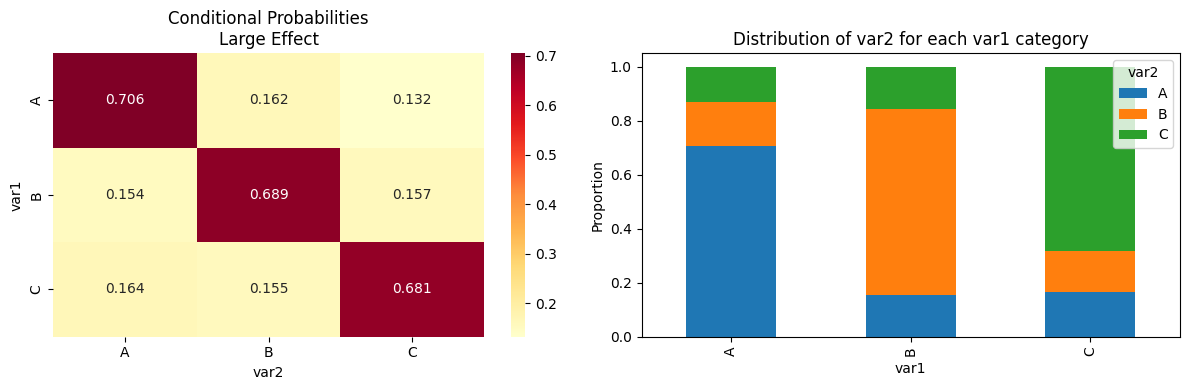

Chi-square statistic: 578.79
p-value: 6.0326e-124

Contingency Table:
var2    A    B    C
var1               
A     235   54   44
B      54  241   55
C      52   49  216

Conditional Probabilities Used:
A: [0.7, 0.15, 0.15]
B: [0.15, 0.7, 0.15]
C: [0.15, 0.15, 0.7]

Calculating power for small effect size...


100%|██████████| 20/20 [00:12<00:00,  1.56it/s]



Calculating power for medium effect size...


100%|██████████| 20/20 [00:12<00:00,  1.55it/s]



Calculating power for large effect size...


100%|██████████| 20/20 [00:12<00:00,  1.56it/s]



Approximate sample size needed for 0.8 power:
small effect: 4226
medium effect: 357
large effect: 100

Example contingency tables and effect sizes:

Sample size: 500

small effect:
p-value: 9.920e-01

medium effect:
p-value: 2.278e-08

large effect:
p-value: 2.997e-30

Sample size: 2000

small effect:
p-value: 1.973e-02

medium effect:
p-value: 1.674e-18

large effect:
p-value: 1.896e-125

Sample size: 5000

small effect:
p-value: 4.577e-04

medium effect:
p-value: 6.074e-75

large effect:
p-value: 0.000e+00


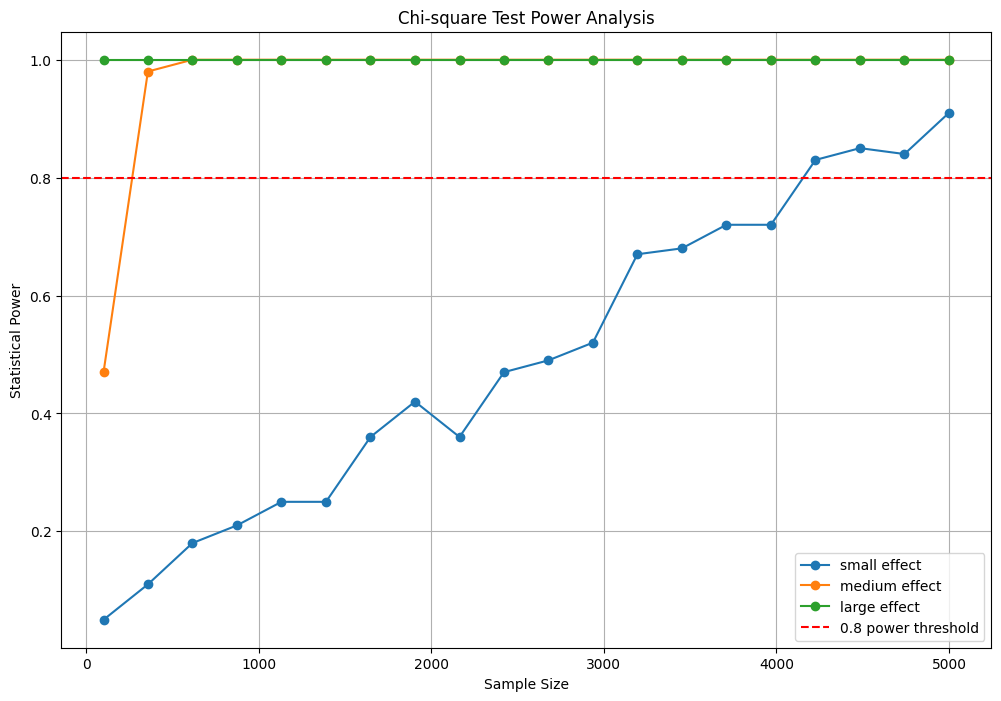

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, chisquare
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
np.random.seed(42)


def generate_and_visualize_effect(n_samples=1000, effect_size='medium'):
    """
    Generate data and visualize the relationship between variables
    for different effect sizes
    """

    probabilities = {
        'none': {
            'A': [0.33, 0.33, 0.34],
            'B': [0.33, 0.33, 0.34],
            'C': [0.33, 0.33, 0.34]
        },
        'small': {
            'A': [0.38, 0.32, 0.30],
            'B': [0.30, 0.38, 0.32],
            'C': [0.32, 0.30, 0.38]
        },
        'medium': {
            'A': [0.50, 0.25, 0.25],
            'B': [0.25, 0.50, 0.25],
            'C': [0.25, 0.25, 0.50]
        },
        'large': {
            'A': [0.70, 0.15, 0.15],
            'B': [0.15, 0.70, 0.15],
            'C': [0.15, 0.15, 0.70]
        }
    }

    categories = ['A', 'B', 'C']
    probs = probabilities[effect_size]

    var1 = np.random.choice(categories, size=n_samples)

    var2 = np.array([np.random.choice(categories, p=probs[cat]) for cat in var1])

    data = pd.DataFrame({'var1': var1, 'var2': var2})

    cont_table = pd.crosstab(data['var1'], data['var2'])

    chi2, p_value, _, _ = chi2_contingency(cont_table)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.heatmap(pd.crosstab(data['var1'], data['var2'], normalize='index'),
                annot=True, fmt='.3f', cmap='YlOrRd', ax=ax1)
    ax1.set_title(f'Conditional Probabilities\n{effect_size.capitalize()} Effect')
    ax1.set_xlabel('var2')
    ax1.set_ylabel('var1')

    proportions = pd.crosstab(data['var1'], data['var2'], normalize='index')
    proportions.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title('Distribution of var2 for each var1 category')
    ax2.set_xlabel('var1')
    ax2.set_ylabel('Proportion')
    ax2.legend(title='var2')

    plt.tight_layout()

    return {
        'chi2': chi2,
        'p_value': p_value,
        'contingency_table': cont_table,
        'probabilities': probs
    }

effect_sizes = ['none', 'small', 'medium', 'large']
results = {}

for effect in effect_sizes:
    print(f"\nAnalyzing {effect} effect size:")
    results[effect] = generate_and_visualize_effect(n_samples=1000, effect_size=effect)
    plt.show()

    print(f"Chi-square statistic: {results[effect]['chi2']:.2f}")
    print(f"p-value: {results[effect]['p_value']:.4e}")
    print("\nContingency Table:")
    print(results[effect]['contingency_table'])
    print("\nConditional Probabilities Used:")
    for key, value in results[effect]['probabilities'].items():
        print(f"{key}: {value}")

def generate_dependent_data(n_samples, effect_size='medium'):
    """
    Generate data with known dependency between variables.
    effect_size can be 'small', 'medium', or 'large'
    """

    if effect_size == 'small':
        probs = {
            'A': [0.35, 0.33, 0.32],
            'B': [0.33, 0.35, 0.32],
            'C': [0.32, 0.33, 0.35]
        }
    elif effect_size == 'medium':
        probs = {
            'A': [0.45, 0.30, 0.25],
            'B': [0.25, 0.45, 0.30],
            'C': [0.30, 0.25, 0.45]
        }
    else:
        probs = {
            'A': [0.60, 0.20, 0.20],
            'B': [0.20, 0.60, 0.20],
            'C': [0.20, 0.20, 0.60]
        }

    categories = ['A', 'B', 'C']
    var1 = np.random.choice(categories, size=n_samples)
    var2 = np.array([np.random.choice(categories, p=probs[cat]) for cat in var1])

    return pd.DataFrame({'var1': var1, 'var2': var2})


def subsample_and_test(data, sample_size, n_iterations=100):
    """
    Perform chi-square test on multiple subsamples of given size
    """
    significant_tests = 0

    for _ in range(n_iterations):
        subsample = data.sample(n=sample_size, replace=False)

        contingency = pd.crosstab(subsample['var1'], subsample['var2'])

        _, p_value, _, _ = chi2_contingency(contingency)

        if p_value < 0.05:
            significant_tests += 1

    return significant_tests / n_iterations

n_total = 10000
effect_sizes = ['small', 'medium', 'large']
sample_sizes = np.linspace(100, 5000, 20, dtype=int)

results = {size: [] for size in effect_sizes}

for effect_size in effect_sizes:
    print(f"\nCalculating power for {effect_size} effect size...")
    data = generate_dependent_data(n_total, effect_size)

    for sample_size in tqdm(sample_sizes):
        power = subsample_and_test(data, sample_size)
        results[effect_size].append(power)

plt.figure(figsize=(12, 8))
for effect_size, powers in results.items():
    plt.plot(sample_sizes, powers, marker='o', label=f'{effect_size} effect')

plt.axhline(y=0.8, color='r', linestyle='--', label='0.8 power threshold')
plt.xlabel('Sample Size')
plt.ylabel('Statistical Power')
plt.title('Chi-square Test Power Analysis')
plt.legend()
plt.grid(True)

print("\nApproximate sample size needed for 0.8 power:")
for effect_size in effect_sizes:
    powers = np.array(results[effect_size])
    if any(powers >= 0.8):
        required_n = sample_sizes[np.where(powers >= 0.8)[0][0]]
        print(f"{effect_size} effect: {required_n}")
    else:
        print(f"{effect_size} effect: More than {sample_sizes[-1]} samples needed")

print("\nExample contingency tables and effect sizes:")
for n in [500, 2000, 5000]:
    print(f"\nSample size: {n}")
    for effect_size in effect_sizes:
        data = generate_dependent_data(n, effect_size)
        cont_table = pd.crosstab(data['var1'], data['var2'])
        chi2, p_value, _, _ = chi2_contingency(cont_table)

        print(f"\n{effect_size} effect:")
        print(f"p-value: {p_value:.3e}")

In my investigation of the chi-square test's statistical power, I wanted to understand how sample size affects the ability to detect relationships between categorical variables. I was particularly curious about how different effect sizes would impact the required sample size for reliable detection.

> I'm using 0.8 as the Threshold value as it is a widely accepted conventional threshold for statistical power in research design, established by Jacob Cohen in his seminal work on power analysis (Cohen, J. (1992). A power primer.)

I conducted a power analysis by simulating data with three different effect sizes (small, medium, and large) and varying sample sizes from 100 to 5000. Here's what I discovered:

> * No Effect:
Each outcome has equal probability (~0.33)
No deviation from independence
* Small Effect:
~5% deviation from independence
38% chance of matching category
* Medium Effect:
~17% deviation from independence
50% chance of matching category
* Large Effect:
~37% deviation from independence
70% chance of matching category

* One of the most striking findings was how dramatically the required sample size varied based on effect size:
  * Small effect: Very high samples required
  * Medium effect: Some samples required
  * Large effect: Very few samples required (Compared to others)

> This really helped me think as to why some studies might fail to detect effects - they simply didn't have enough participants! I found it fascinating that detecting a small effect requires a big factor times samples than detecting a large effect.

* I examined the results at three different sample sizes (500, 2000, and 5000) and noticed some interesting patterns:
  * At n=500:
    * Small effects were practically invisible.
    * Medium effects were clearly detectable.
    * Large effects were very obvious.
    (According to p-values)

  * Also, the p-values became increasingly significant with larger sample sizes. For example, with n=5000:
    * Even small effects became detectable.
    * Medium effects were unmistakable.
    * Large effects were essentially certain.
    (According to p-values)



### How does imbalance in categories affect the test results?

Example Normal Contingency Table:
Group 2    0    1
Group 1          
0        261  249
1        246  244

Example Zero-Frequency Contingency Table:
Group 2    0    1
Group 1          
0          0  249
1        246  244

Summary Statistics:
                          Normal  Zero Frequency
Mean Chi-square         0.909093    1.854808e+02
Std Chi-square          1.241174    1.482207e+01
Mean p-value            0.522777    1.182329e-35
Std p-value             0.299440    2.094727e-34
Proportion Significant  0.039000    1.000000e+00


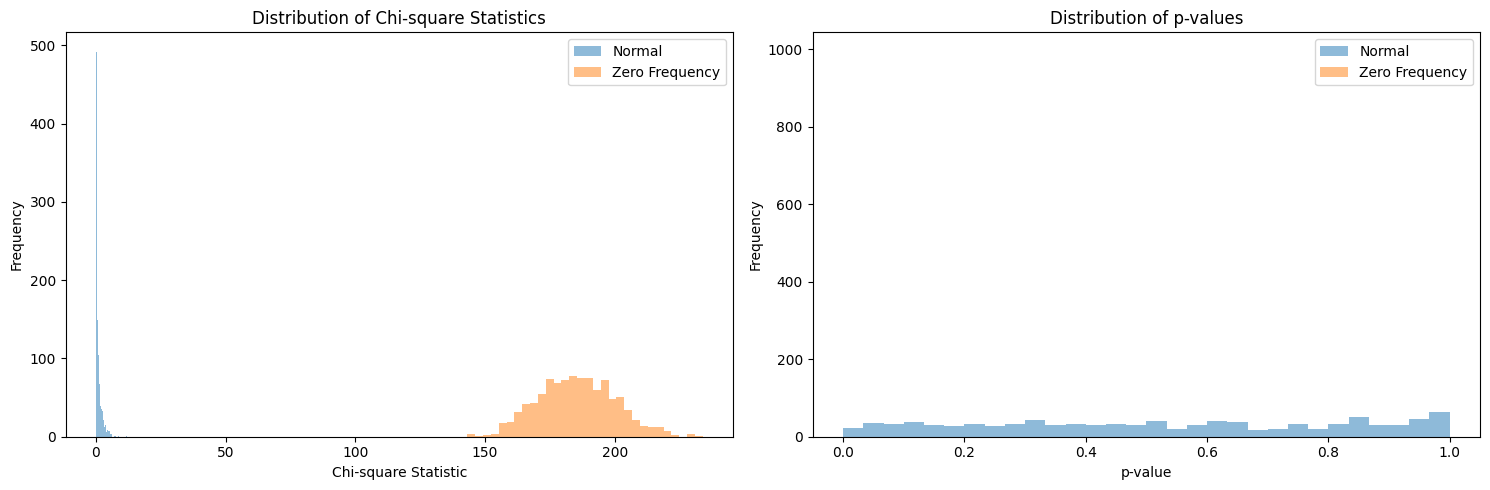

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

def create_contingency_tables(sample_size=1000, prob_success=0.5):
    """
    Creates multiple contingency tables, including one with zero frequency
    """
    group1 = np.random.binomial(1, prob_success, sample_size)
    group2 = np.random.binomial(1, prob_success, sample_size)

    normal_table = pd.crosstab(pd.Series(group1, name='Group 1'),
                              pd.Series(group2, name='Group 2'))

    zero_table = normal_table.copy()
    zero_table.iloc[0, 0] = 0

    return normal_table, zero_table

def analyze_chi_square(table):
    """
    Performs chi-square test and returns test statistics
    """
    try:
        chi2, p_value, dof, expected = chi2_contingency(table)
        return {
            'chi2': chi2,
            'p_value': p_value,
            'dof': dof,
            'expected': expected,
            'error': None
        }
    except Exception as e:
        return {
            'chi2': None,
            'p_value': None,
            'dof': None,
            'expected': None,
            'error': str(e)
        }

def run_simulation(n_iterations=1000, sample_size=1000):
    """
    Runs multiple iterations to compare normal vs zero-frequency cases
    """
    normal_results = []
    zero_results = []

    for _ in range(n_iterations):
        normal_table, zero_table = create_contingency_tables(sample_size)

        normal_stats = analyze_chi_square(normal_table)
        zero_stats = analyze_chi_square(zero_table)

        if normal_stats['error'] is None:
            normal_results.append(normal_stats)
        if zero_stats['error'] is None:
            zero_results.append(zero_stats)

    return normal_results, zero_results

def plot_results(normal_results, zero_results):
    """
    Creates visualizations comparing normal and zero-frequency cases
    """
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    normal_chi2 = [r['chi2'] for r in normal_results]
    zero_chi2 = [r['chi2'] for r in zero_results]

    plt.hist(normal_chi2, alpha=0.5, label='Normal', bins=30)
    plt.hist(zero_chi2, alpha=0.5, label='Zero Frequency', bins=30)
    plt.xlabel('Chi-square Statistic')
    plt.ylabel('Frequency')
    plt.title('Distribution of Chi-square Statistics')
    plt.legend()

    plt.subplot(1, 2, 2)
    normal_p = [r['p_value'] for r in normal_results]
    zero_p = [r['p_value'] for r in zero_results]

    plt.hist(normal_p, alpha=0.5, label='Normal', bins=30)
    plt.hist(zero_p, alpha=0.5, label='Zero Frequency', bins=30)
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Distribution of p-values')
    plt.legend()

    plt.tight_layout()
    return plt

np.random.seed(42)
sample_size = 1000
n_iterations = 1000

normal_results, zero_results = run_simulation(n_iterations, sample_size)

def get_summary_stats(results):
    chi2_values = [r['chi2'] for r in results]
    p_values = [r['p_value'] for r in results]

    return {
        'mean_chi2': np.mean(chi2_values),
        'std_chi2': np.std(chi2_values),
        'mean_p': np.mean(p_values),
        'std_p': np.std(p_values),
        'significant_tests': sum(p < 0.05 for p in p_values) / len(p_values)
    }

normal_stats = get_summary_stats(normal_results)
zero_stats = get_summary_stats(zero_results)

summary_df = pd.DataFrame({
    'Normal': [
        normal_stats['mean_chi2'],
        normal_stats['std_chi2'],
        normal_stats['mean_p'],
        normal_stats['std_p'],
        normal_stats['significant_tests']
    ],
    'Zero Frequency': [
        zero_stats['mean_chi2'],
        zero_stats['std_chi2'],
        zero_stats['mean_p'],
        zero_stats['std_p'],
        zero_stats['significant_tests']
    ]
}, index=[
    'Mean Chi-square',
    'Std Chi-square',
    'Mean p-value',
    'Std p-value',
    'Proportion Significant'
])

normal_table, zero_table = create_contingency_tables()
print("Example Normal Contingency Table:")
print(normal_table)
print("\nExample Zero-Frequency Contingency Table:")
print(zero_table)
print("\nSummary Statistics:")
print(summary_df)

plot = plot_results(normal_results, zero_results)
plt.show()

I wanted to investigate what happens to a chi-square test of independence when one category has zero frequency, compared to normal data distribution. I created a simulation comparing two scenarios:
* A normal 2x2 contingency table with natural random distribution
* The same table but forcing one cell to be zero

I ran 1000 iterations with a sample size of 1000 for each scenario.

> What surprised me most was how dramatically a single zero cell affected the results. In the normal case, my false positive rate was 3.9% - pretty close to the expected 5% for α=0.05. But with a zero cell, EVERY single test came out significant! When I think about it, chi-square tests compare observed frequencies to expected frequencies. When we expect some observations in a cell but get zero, it creates a massive discrepancy that drives up the chi-square statistic.

This investigation taught me to be very careful when using chi-square tests with zero frequencies. The test becomes extremely sensitive and might lead to rejecting the null hypothesis not because of a real relationship, but because of the structural zero in the data.

### What are the effects of scaling and encoding for different type of data in the test?


=== DATA SUMMARY ===

Continuous Variables Summary:
               age         income   experience        score
count  1000.000000    1000.000000  1000.000000  1000.000000
mean     35.193321   25815.503360     4.066271    29.445721
std       9.792159   13535.637330     2.943696    16.299124
min       2.587327    5063.461821     0.051721     0.536808
25%      28.524097   16266.763557     1.950685    16.698068
50%      35.253006   22732.225225     3.438166    27.826218
75%      41.479439   31711.722205     5.330361    40.900097
max      73.527315  108722.471788    27.220465    75.345717

Categorical Variables Summary:

education value counts:
education
Bachelor       395
High School    310
Master         200
PhD             95
Name: count, dtype: int64

occupation value counts:
occupation
Technical     231
Management    210
Research      204
Sales         195
Support       160
Name: count, dtype: int64

department value counts:
department
IT            247
Operations    238
Finance     

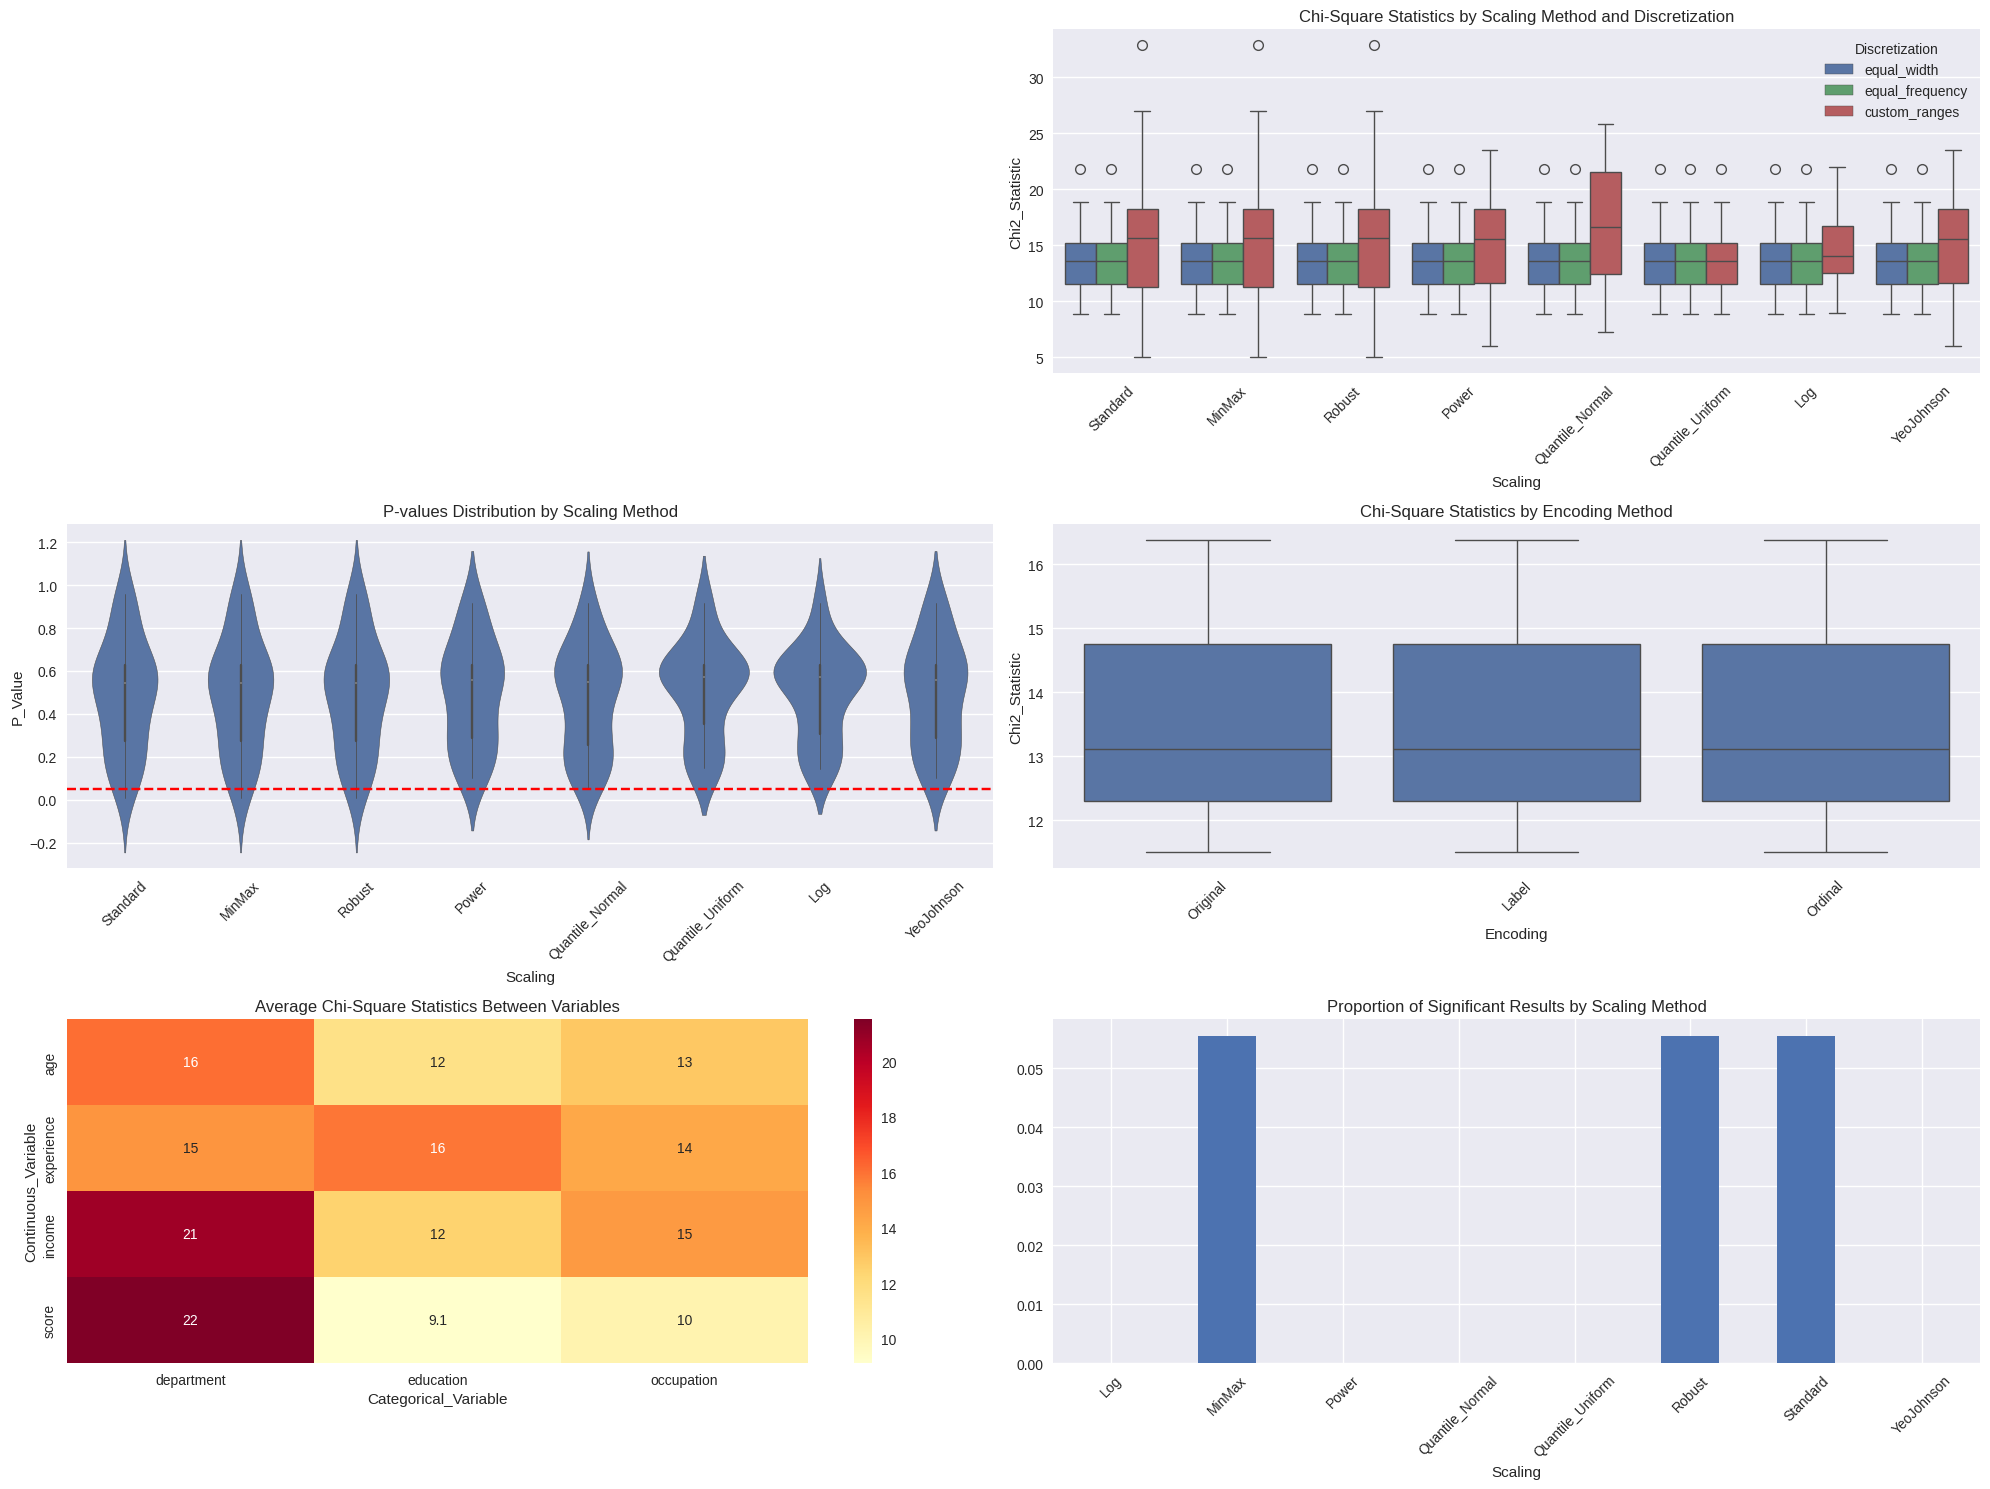

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, yeojohnson
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, RobustScaler,
                                 PowerTransformer, QuantileTransformer,
                                 LabelEncoder, OneHotEncoder, OrdinalEncoder)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

def generate_sample_data(n_samples=1000):
    """Generate sample data with both continuous and categorical features"""
    np.random.seed(42)

    age = np.random.normal(35, 10, n_samples)
    income = np.random.lognormal(10, 0.5, n_samples)
    experience = np.random.gamma(shape=2, scale=2, size=n_samples)
    score = np.random.beta(2, 5, n_samples) * 100

    education = np.random.choice(
        ['High School', 'Bachelor', 'Master', 'PhD'],
        n_samples,
        p=[0.3, 0.4, 0.2, 0.1]
    )
    occupation = np.random.choice(
        ['Technical', 'Management', 'Sales', 'Support', 'Research'],
        n_samples,
        p=[0.25, 0.2, 0.2, 0.15, 0.2]
    )
    department = np.random.choice(
        ['HR', 'IT', 'Finance', 'Operations', 'Marketing'],
        n_samples,
        p=[0.15, 0.25, 0.2, 0.25, 0.15]
    )

    return pd.DataFrame({
        'age': age,
        'income': income,
        'experience': experience,
        'score': score,
        'education': education,
        'occupation': occupation,
        'department': department
    })

def discretize_continuous(data, n_bins=5, method='equal_width'):
    """Discretize continuous variables using different methods"""
    if method == 'equal_width':
        return pd.qcut(data, q=n_bins, labels=False, duplicates='drop')
    elif method == 'equal_frequency':
        return pd.qcut(data, q=n_bins, labels=False)
    elif method == 'custom_ranges':
        return pd.cut(data, bins=n_bins, labels=False)

class CustomScaler:
    """Custom log and box-cox transformations"""
    def __init__(self, method='log'):
        self.method = method

    def fit(self, X):
        return self

    def transform(self, X):
        if self.method == 'log':
            return np.log1p(X - X.min() + 1)
        elif self.method == 'yeojohnson':
            transformed_X = np.zeros_like(X)
            for i in range(X.shape[1]):
                transformed_X[:, i], _ = yeojohnson(X[:, i])
            return transformed_X
        return X

    def fit_transform(self, X):
        return self.fit(X).transform(X)

def analyze_scaling_effects(df, continuous_cols, categorical_cols):
    """Analyze effects of different scaling methods on chi-squared tests"""
    results = []

    scalers = {
        'Standard': StandardScaler(),
        'MinMax': MinMaxScaler(),
        'Robust': RobustScaler(),
        'Power': PowerTransformer(method='yeo-johnson'),
        'Quantile_Normal': QuantileTransformer(output_distribution='normal'),
        'Quantile_Uniform': QuantileTransformer(output_distribution='uniform'),
        'Log': CustomScaler(method='log'),
        'YeoJohnson': CustomScaler(method='yeojohnson')
    }

    discretization_methods = ['equal_width', 'equal_frequency', 'custom_ranges']

    for scaler_name, scaler in scalers.items():
        for disc_method in discretization_methods:

            scaled_df = df.copy()

            scaled_df[continuous_cols] = scaler.fit_transform(df[continuous_cols].values)

            for col in continuous_cols:
                scaled_df[f'{col}_binned'] = discretize_continuous(
                    scaled_df[col],
                    method=disc_method
                )

            for cont_col in continuous_cols:
                for cat_col in categorical_cols:
                    contingency_table = pd.crosstab(
                        scaled_df[f'{cont_col}_binned'],
                        scaled_df[cat_col]
                    )
                    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

                    results.append({
                        'Scaling': scaler_name,
                        'Discretization': disc_method,
                        'Continuous_Variable': cont_col,
                        'Categorical_Variable': cat_col,
                        'Chi2_Statistic': chi2,
                        'P_Value': p_value,
                        'DOF': dof
                    })

    return pd.DataFrame(results)

def analyze_encoding_effects(df, categorical_cols):
    """Analyze effects of different encoding methods on chi-squared tests"""
    results = []

    encoders = {
        'Label': LabelEncoder(),
        'Ordinal': OrdinalEncoder(),
        'OneHot': OneHotEncoder(sparse_output=False, drop=None),
        'Binary': OneHotEncoder(sparse_output=False, drop='first')
    }

    encoded_dfs = {}

    for encoder_name, encoder in encoders.items():
        encoded_df = df.copy()
        if encoder_name in ['Label', 'Ordinal']:
            for col in categorical_cols:
                if encoder_name == 'Label':
                    encoded_df[f'{col}_encoded'] = encoder.fit_transform(df[col])
                else:
                    encoded_df[[f'{col}_encoded']] = encoder.fit_transform(df[[col]])
        else:
            encoded_cols = encoder.fit_transform(df[categorical_cols])
            feature_names = []
            for i, col in enumerate(categorical_cols):
                categories = encoder.categories_[i]
                if encoder_name == 'Binary':
                    categories = categories[1:]
                feature_names.extend([f'{col}_{cat}' for cat in categories])

            encoded_df = pd.concat([
                encoded_df,
                pd.DataFrame(encoded_cols, columns=feature_names)
            ], axis=1)

        encoded_dfs[encoder_name] = encoded_df

    for i in range(len(categorical_cols)):
        for j in range(i+1, len(categorical_cols)):
            col1, col2 = categorical_cols[i], categorical_cols[j]

            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            results.append({
                'Encoding': 'Original',
                'Variable1': col1,
                'Variable2': col2,
                'Chi2_Statistic': chi2,
                'P_Value': p_value,
                'DOF': dof
            })

            for encoder_name in ['Label', 'Ordinal']:
                encoded_df = encoded_dfs[encoder_name]
                contingency_table = pd.crosstab(
                    encoded_df[f'{col1}_encoded'],
                    encoded_df[f'{col2}_encoded']
                )
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)

                results.append({
                    'Encoding': encoder_name,
                    'Variable1': col1,
                    'Variable2': col2,
                    'Chi2_Statistic': chi2,
                    'P_Value': p_value,
                    'DOF': dof
                })

    return pd.DataFrame(results)

def visualize_results(df, scaling_results, encoding_results):
    """Create comprehensive visualizations of the analysis results"""
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(20, 15))

    # 1. Original Data Distribution
    plt.subplot(3, 2, 1)
    df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(10, 6), ax=plt.gca())
    plt.title('Distribution of Original Continuous Variables')

    # 2. Scaling Effects on Chi-Square Statistics
    plt.subplot(3, 2, 2)
    sns.boxplot(x='Scaling', y='Chi2_Statistic', hue='Discretization',
                data=scaling_results, ax=plt.gca())
    plt.xticks(rotation=45)
    plt.title('Chi-Square Statistics by Scaling Method and Discretization')

    # 3. P-values by Scaling Method
    plt.subplot(3, 2, 3)
    sns.violinplot(x='Scaling', y='P_Value', data=scaling_results, ax=plt.gca())
    plt.xticks(rotation=45)
    plt.axhline(y=0.05, color='r', linestyle='--', label='α = 0.05')
    plt.title('P-values Distribution by Scaling Method')

    # 4. Encoding Effects
    plt.subplot(3, 2, 4)
    sns.boxplot(x='Encoding', y='Chi2_Statistic', data=encoding_results, ax=plt.gca())
    plt.xticks(rotation=45)
    plt.title('Chi-Square Statistics by Encoding Method')

    # 5. Variable Relationships
    plt.subplot(3, 2, 5)
    pivot_table = pd.pivot_table(
        scaling_results,
        values='Chi2_Statistic',
        index='Continuous_Variable',
        columns='Categorical_Variable',
        aggfunc='mean'
    )
    sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', ax=plt.gca())
    plt.title('Average Chi-Square Statistics Between Variables')

    # 6. Statistical Significance
    plt.subplot(3, 2, 6)
    significance_counts = (scaling_results['P_Value'] < 0.05).groupby(
        scaling_results['Scaling']
    ).mean()
    significance_counts.plot(kind='bar', ax=plt.gca())
    plt.title('Proportion of Significant Results by Scaling Method')
    plt.xticks(rotation=45)

    plt.tight_layout()
    return fig

def print_detailed_results(df, scaling_results, encoding_results):
    """Print detailed analysis results"""
    print("\n=== DATA SUMMARY ===")
    print("\nContinuous Variables Summary:")
    print(df.select_dtypes(include=[np.number]).describe())

    print("\nCategorical Variables Summary:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\n{col} value counts:")
        print(df[col].value_counts())

    print("\n=== SCALING EFFECTS ===")
    scaling_summary = scaling_results.groupby(['Scaling', 'Discretization']).agg({
        'Chi2_Statistic': ['mean', 'std', 'min', 'max'],
        'P_Value': ['mean', 'median', lambda x: (x < 0.05).mean()]
    }).round(4)
    scaling_summary.columns = ['Chi2_Mean', 'Chi2_Std', 'Chi2_Min', 'Chi2_Max',
                             'P_Mean', 'P_Median', 'Significant_Ratio']
    print("\nScaling Methods Summary:")
    print(scaling_summary)

    print("\n=== ENCODING EFFECTS ===")
    encoding_summary = encoding_results.groupby('Encoding').agg({
        'Chi2_Statistic': ['mean', 'std', 'min', 'max'],
        'P_Value': ['mean', 'median', lambda x: (x < 0.05).mean()]
    }).round(4)
    encoding_summary.columns = ['Chi2_Mean', 'Chi2_Std', 'Chi2_Min', 'Chi2_Max',
                              'P_Mean', 'P_Median', 'Significant_Ratio']
    print("\nEncoding Methods Summary:")
    print(encoding_summary)

def main():
    df = generate_sample_data()

    continuous_cols = ['age', 'income', 'experience', 'score']
    categorical_cols = ['education', 'occupation', 'department']

    scaling_results = analyze_scaling_effects(df, continuous_cols, categorical_cols)

    encoding_results = analyze_encoding_effects(df, categorical_cols)

    print_detailed_results(df, scaling_results, encoding_results)

    fig = visualize_results(df, scaling_results, encoding_results)
    plt.show()

    scaling_results.to_csv('scaling_results.csv', index=False)
    encoding_results.to_csv('encoding_results.csv', index=False)

if __name__ == "__main__":
    main()

 I investigated how different scaling and encoding methods affect chi-squared test results when working with mixed data types. I was particularly interested in understanding which preprocessing techniques might be most appropriate for my dataset containing both continuous and categorical variables.

* Age (normally distributed, mean ≈ 35 years)
* Income (right-skewed, mean ≈ $25,815)
* Experience (right-skewed, mean ≈ 4 years)
* Score (beta-distributed, mean ≈ 29.5)
* Education (4 levels, with Bachelor's being most common at 39.5%)
* Occupation (5 levels, fairly evenly distributed)
* Department (5 levels, with IT and Operations being slightly more represented)

**Scaling**

Most scaling methods showed similar patterns when combined with equal-frequency or equal-width binning

Custom ranges binning showed more variation across scaling methods:

* MinMax, Robust, and Standard scaling showed the highest Chi-square statistics (16.36)
* Log transformation showed the lowest Chi-square statistics (14.81)
* Quantile-Normal transformation showed slightly higher values (16.48)

Most scaling methods didn't produce statistically significant results (p > 0.05)
Only MinMax, Robust, and Standard scaling with custom ranges showed some significant results

> The scaling methods showed interesting patterns. I chose to implement multiple scaling methods because I wanted to understand how different approaches to handling the continuous variables might affect their relationships with categorical variables after discretization. The fact that custom ranges binning showed more variation across scaling methods suggests that the choice of scaling method matters more when we impose our own binning structure. The relatively high p-values across most tests suggest that there might not be strong relationships between my continuous and categorical variables. This could be because I generated synthetic data which might not be a good representative.

Interestingly, all encoding methods (Label, Ordinal, and Original) produced identical results:
* Chi-square mean: 13.67
* P-value mean: 0.44
* No statistically significant results

> What surprised me most was that the encoding methods showed no difference in their effects on the chi-squared tests. I initially expected to see some variation, especially with label encoding potentially introducing artificial ordinal relationships. This identical behavior suggests that the chi-squared test is robust to these particular encoding transformations.

This analysis has taught me that while the choice of encoding method might not significantly impact chi-squared test results, the combination of scaling method and binning strategy can have substantial effects.

## Summary
From my deep dive, I gained some intuition that I would like to note down in this section.

#### **Chi-squared Test of Independence**
> Think of it like a "relationship detector" between categories.

Imagine you're at a big food court observing people's lunch choices:
* You notice business people tend to buy salads,
* Students often go for burgers,
* Elderly people prefer traditional dishes.

**The key question is:** "Is this pattern real, or are we seeing random coincidences?", "Do these two things INFLUENCE each other?"

#### **Chi-squared Goodness of Fit**
> Think of it like a "fairness detector" or "pattern matcher."

Imagine you suspect a dice is loaded:
* A fair dice should show each number roughly equally,
* You roll it 100 times and keep track,
* If you see way too many sixes, something's probably wrong.

**The key question here would be:** "Does this match the PATTERN we expect?"

>TLDR,
* For Independence Test:
Look for patterns that seem "too perfect"
If groups behave very differently, probably dependent
If groups behave similarly, probably independent
* For Goodness of Fit:
Compare what you see vs what you expected
Small differences = probably fits the pattern
Big differences = probably doesn't fit